# Multi-label prediction with Planet Amazon dataset

## Lesson 3 Notes

[from hiromis](https://github.com/hiromis/notes/blob/master/Lesson3.md)

[from poonav](https://forums.fast.ai/t/deep-learning-lesson-3-notes)

[discussion thread](https://forums.fast.ai/t/lesson-3-in-class-discussion/29733)

[video timeline](https://forums.fast.ai/t/lesson-3-official-resources-and-updates/29732)

[fastai-doc](https://docs.fast.ai/)


[Planet Amazon video timing](https://www.youtube.com/watch?v=PW2HKkzdkKY&feature=youtu.be&t=26m)


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

## Focus on the data block API

[Data block API documentation](https://docs.fast.ai/data_block.html)

The data block API lets you customize how to create a [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch)  by isolating the underlying parts of that process in separate blocks, mainly:

- where are the inputs
- how to label them
- how to split the data into a training and validation set
- what type of [Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) to create
- possible transforms "augmentation" to apply
- how to warp in dataloaders and create the [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch)

see code below:

    `data = (ImageFileList.from_folder(planet)   
        #Where to find the data? -> in the folder planet and its subfolders
        .label_from_csv('labels.csv', sep=' ', folder='train', suffix='.jpg')  
        #How to label? -> use the csv file labels.csv in path, 
        #add .jpg to the names and take them in the folder train
        .random_split_by_pct()                     
        #How to split in train/valid? -> randomly with the default 20% in valid
        .datasets()
        #How to convert to datasets? -> use ImageMultiDataset
        .transform(planet_tfms, size=128)             
        #Data augmentation? -> use tfms with an image size of 128
        .databunch())                          
        #Finally? -> use the defaults for conversion to databunch`
        
        
In this case:

- An ImageFileList
- We are grabbing it from a folder
- labels are stored in a CSV file
- We're randomly splitting it (by default it's 20%)
- Creating data sets
- Transforming it using these transforms (`planet_tfms`), we're going to use a smaller size (128).
- Then create a data bunch

### Data block API examples
[examples](https://github.com/fastai/fastai/blob/master/docs_src/data_block.ipynb)

## Focus on Pytorch concepts
Let's study the Pytorch Objects or Classes that we are going to need.
You are gonna see them all the time in the Pytorch and fast.ai docs.


### Dataset (Pytorch)

[Video timing](https://www.youtube.com/watch?v=PW2HKkzdkKY&feature=youtu.be&t=18m30s)

Below is the source code of the DataSet class

It Actually does nothing at all.
[DataSet](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#Dataset) defines two things:

1.   `__getitem__()`
2.  `__len()__`

In Python, this __<SOMETHING>__(Note there are two underscores at the start as well as in the end) are special methods with special behaviors.
You can look at these specific methods in Pytorch docs.

`__getitem__()` means object can be indexed with [ ] brackets.
`o[3] gets you the fourth object in the dataset. where 3 is the index in the function definition. Note indexing starts from 0.

`__len__()` is the length of the entire dataset. So, if you call len(o) it will give you the length of total images in the dataset.

Both are raising `NotImplementedError`.

It means although You have to tell Pytorch about your data, you need to create a DataSet. It doesn’t really do anything to help you to actually create a DataSet. It just defines what the dataset needs to be present.
  
In other words, it just defines which is the 3rd item in my dataset(getitem()) and how much big is my dataset(len())?
Fast.ai has a lot of subclasses that do that for all different kinds of data stuff.
So far we have seen Image Classification Datasets. These are the datasets where getitem() will return an image and single label of that image.

So that’s what a dataset is. Now just dataset is not enough to train model.
  
### DataLoader (Pytorch)
  
[video timing](https://www.youtube.com/watch?v=PW2HKkzdkKY&feature=youtu.be&t=20m40s)
  
[Data loader](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataloader.html#DataLoader):  Combines a dataset and a sampler, and provides
    single- or multi-process iterators over the dataset.


The first thing we have to do if you remember last week’s Gradient Descent Tutorial is we have to have few images or few items at a time so that GPU can work in parallel.
Remember we do this thing called minibatch. Minibatch is a few models we present to a model at a time that can be trained in Parallel.

So to create a minibatch we use another Pytorch class called a DataLoader.
 
DataLoader takes Dataset in its Constructor. So; its gonna get the 3rd item, 6th item or the 20th item, it’s gonna grab items at random. And create a batch of whatever size you want and send it to GPU.

DataLoader is something that grabs individual items combines them into a mini batch and sent over to GPU for training.
So you can see from the argument list there are already a lot of choices you have to make.
What kind of Dataset am I creating, where is data is going to come from? For Dataloader what should be the batch size.


### DataBunch (fastai)
[video timing](https://www.youtube.com/watch?v=PW2HKkzdkKY&feature=youtu.be&t=1319)

This still isn’t enough to train a model. Because we have no way to validate. Before we had was a training set
We need a separate set of holdout data called as a validation set. We will see how its gonna look.
So for that, we use the fast.ai class called DataBunch.
  
A DataBunch is something which binds together a training data loader and a validation data loader.
When you look at fast.ai docs, if you don’t know what is the variable/symbol be used for you can look up elsewhere. In the class argument list, you can see train_dl is a dataloader. (argument : Type)

So when you create a DataBunch, you are basically giving a train and valid dataloaders. And that is now an object that you can send off to a learner. Then it will start learning. That was basic stuff



## Getting the data from Kaggle
[Kaggle](kaggle.com) is competition website for Machine Learning and Deep Learning real-world problems. You can compete there and try to aim to rank on at least on the top 10% on the leaderboard.  To work with Kaggle, you need to upload our Kaggle credentials (**a kaggle.json file**)

In [0]:
# upload the Kaggle credentials - file: kaggle.json
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [0]:
# testing the access to the Kaggle website
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       2638           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      10931           False  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4400           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         34           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       2669           False  
two-sigma-financial-news                           2019-07-15 23:59:00  Featured          $100,000      

## Downloading the data from Kaggle

The planet dataset isn't available on the [fastai dataset page](https://course.fast.ai/datasets) due to copyright restrictions. You can download it from Kaggle however. Let's see how to do this by using the [Kaggle API](https://github.com/Kaggle/kaggle-api) as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add `source activate fastai` or similar, or prefix `pip` with a path. Have a look at how `conda install` is called for your platform in the appropriate *Returning to work* section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

In [0]:
# installing the Kaggle API
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.3)


Then you need to upload your credentials from Kaggle on your instance. 
- Login to kaggle and click on your profile picture on the top left corner, then 'My account'. 
- Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal).

In [0]:
# *** IGNORE THIS CODE *** done already.
# ! mkdir -p ~/.kaggle/
# ! mv /content/kaggle.json ~/.kaggle/
# ! mv /content/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat '/content/kaggle.json': No such file or directory
mv: cannot stat '/content/kaggle.json': No such file or directory


You're all set to download the data from [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space). You **first need to go to its main page and accept its rules**, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a `403 forbidden` error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on *Rules* tab, and then scroll to the bottom to find the *accept* button).

In [0]:
# Config.data_path returns the following path: /root/.fastai/data
# creating the sub-directory: planet
path = Config.data_path()/'planet'
path.mkdir(exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

NOTE: Downloading Kaggle datasets and unzip the files.

If you get a 403 forbidden error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on Rules tab, and then scroll to the bottom to find the accept button).
It can also happen if your Kaggle account has not been certified.

---



In [0]:
# download the Kaggle dataset and unzip the files
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}

100% 599M/600M [00:05<00:00, 143MB/s]
100% 600M/600M [00:05<00:00, 112MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 49.0MB/s]


In [0]:
path.ls()  

[PosixPath('/root/.fastai/data/planet/train-jpg.tar.7z'),
 PosixPath('/root/.fastai/data/planet/train_v2.csv'),
 PosixPath('/root/.fastai/data/planet/train_v2.csv.zip'),
 PosixPath('/root/.fastai/data/planet/__MACOSX')]

To extract the content of this file, we'll need 7zip, so uncomment the following line if you need to install it (or run `sudo apt install p7zip` in your terminal).

NOTE: 7zip is installed with colab so no need to install it.


In [0]:
# 7zip is installed with codelab.
# ! conda install -y -c haasad eidl7zip

And now we can unpack the data (uncomment to run - this might take a few minutes to complete).

In [0]:
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path}

## Multiclassification

Contrary to the pets dataset studied in last lesson, here, each picture can have multiple labels. If we take a look at the csv file containing the labels (in '**train_v2.csv**' here) we see that each 'image_name' is associated to several tags separated by spaces.

In [0]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageItemList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

NOTE1:  The data block API lets you customize the creation of a `DataBunch` by isolating the underlying parts of that process in separate blocks, mainly:

- Where are the inputs and how to create them?
- How to split the data into a training and validation sets?
- How to label the inputs?
- What transforms to apply?
- How to add a test set?
- How to wrap in dataloaders and create the DataBunch?

NOTE2: For example, to grab the planet data we would say:

- We've got a list of image files that are in a folder
- They're labeled based on a CSV with this name (**train_v2.csv**)
- They have this separator ( ) (blank space). By passing in separator, it's going to create multiple labels.
- The images are in this folder (**train-jpg**). They have this suffix (.jpg)
- They're going to be randomly spit out into a validation set with 20% of the data
- We're going to create datasets from that, which we are then going to transform with these transformations (**tfms**)
- Then we going to create a** data bunch** out of that, which we will then normalize using these statistics (imagenet_stats)

In [0]:
# data augmentation
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

NOTE:  see specific section on data augmentation at the end of the notebook.

In [0]:
??get_transforms()

NOTE:  Pay attention to the specific data augmentations applied here as seen in the parameters of get_transforms. `flip_vert=True` because for satellite image the specific orientation should not matter. `max_lighting=0.1` and `max_zoom=1.05` are what Jeremy finds to work the best with such images.

`max_wrap` will change the perspective of the picture. It is handy when it comes to datasets like pets and cars, which clearly can be viewed from different perspectives; you can look at the dog from atop, or on the same level when staying close to the ground and playing with it. But for satellite, it always views the ground from the same perspective–high up above the ground in the space. Thus, adding a perspective wrap to the training dataset will make it unrepresentative of real satellite images.

We are next going to create Dataset and transform them with transformation defined as tfms(in the 1st cell)
which is going to create DataBunch out of that which is then going to normalize data using ImageNet statistics.



We use parentheses around the data block pipeline below, so that we can use a multiline statement without needing to add '\\'.

In [0]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
# image size: 128px
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

NOTE: `size=128` Kaggle planet images have a size of 256 px.  We chose a size of 128 px for faster processing.  This is one good reason, but also, I have now a model that can also work with bigger size images, as we will be doing later on, this is called transfer learning.


NOTE: multi-labels are separated by a semi-colon (;)

`show_batch` still works, and show us the different labels separated by `;`.


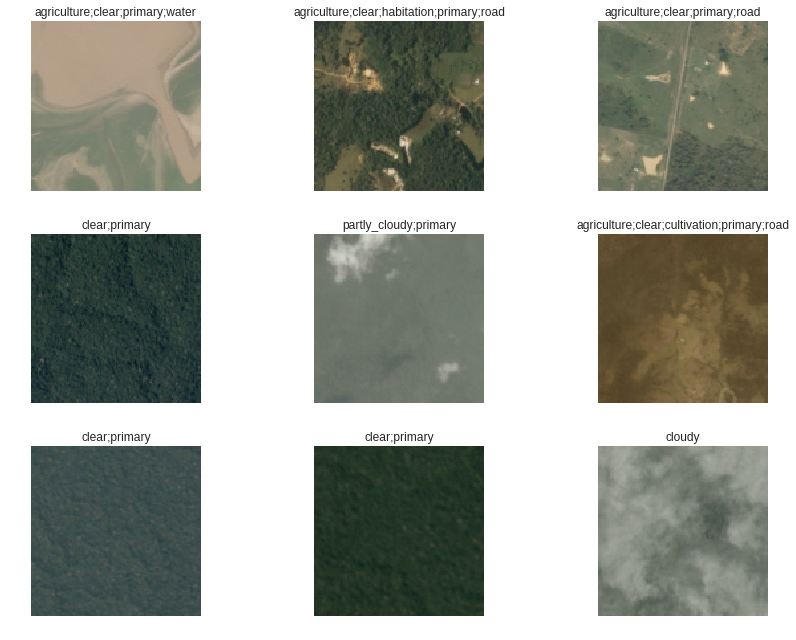

In [0]:
data.show_batch(rows=3, figsize=(12,9))

NOTE:  Above are small tiles from satellite images. Each one has a number of different labels.

Label represents

- Weather: cloudy, partly cloudy
- primary:  primary rainforest
- agriculture: means some farming is done
- roads: means road and so forth.

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet34 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

As for `fbeta`, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details.

In [0]:
arch = models.resnet50

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 97954211.61it/s]


NOTE: Metrics:  We use metrics for seeing how the model is performing on the validation set. 

`accuracy_thresh` Compute accuracy when y_pred and y_true are the same size.

`f_score` : Kaggle uses this metric to score your predictions on planet data.
When you have classifier you going to have some false positives and false negatives. How do you weigh up those two things? You have to kinda create a single number from those two. Lots of different ways to do that.
f_score is nice way fo combining that into a single number.
There are various types of f_score functions like f1 score, f2 score etc.

In [0]:
??fbeta

In [0]:
??accuracy_thresh

We use the LR Finder to pick a good learning rate.


In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


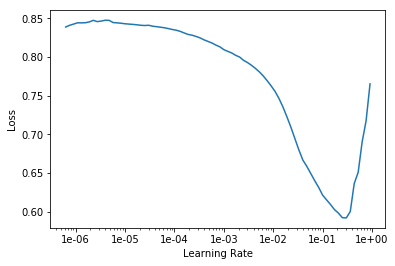

In [0]:
learn.recorder.plot()

Then we can fit the head of our network.

In [0]:
# 1e-02
lr = 0.01

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.124651,0.108044,0.944919,0.905932
2,0.109383,0.102748,0.956618,0.909627
3,0.099936,0.092236,0.953682,0.919375
4,0.095342,0.087872,0.956008,0.923664
5,0.092258,0.086757,0.956531,0.925726


In [0]:
learn.save('stage-1-rn50')

## Fine-tuning the model

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


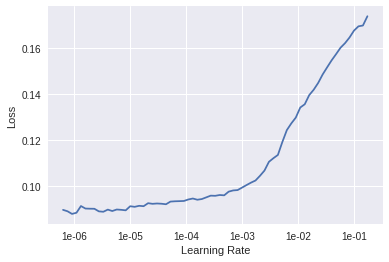

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.098689,0.091189,0.952759,0.918903
2,0.097336,0.088620,0.954031,0.922262
3,0.091535,0.086003,0.955913,0.924829
4,0.083657,0.082864,0.957759,0.928835
5,0.080532,0.082097,0.959110,0.929827


In [0]:
learn.save('stage-2-rn50')

## Making the model better - Transfer Learning
changing the image size from 128 px to 256 px.

When I created my dataset, I put size=128 and actually the images that Kaggle gave us are 256. I used the size of 128 partially because I wanted to experiment quickly. **It's much quicker and easier to use small images to experiment**. 

But there's a second reason. I now have a model that's pretty good at recognizing the contents of 128 by 128 satellite images. **So why not use this first model as transfer learning.**  

There will not be a risk of overfitting, because my images are now twice the size (256x256 px),  it is like having a new dataset.

So let's keep our same learner but use a new data bunch where the data bunch is 256 by 256. 

In [0]:
# image size now 256 px
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data # transfer learning
data.train_ds[0][0].shape

NOTE: `learn.data = data`: we are replacing the data inside our learner with this new data bunch.

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


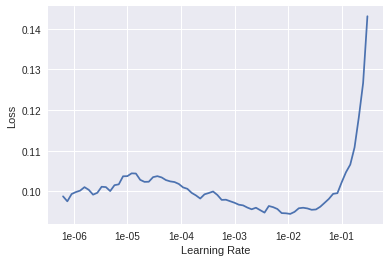

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.085345,0.085811,0.957664,0.926733
2,0.085528,0.083957,0.959314,0.926967
3,0.085748,0.082153,0.960673,0.930059
4,0.080484,0.081255,0.960317,0.930384
5,0.080045,0.080621,0.959612,0.931753


In [0]:
learn.save('stage-1-256-rn50')

### Fine Tuning 

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.083225,0.084390,0.959866,0.928732
2,0.083866,0.083645,0.956342,0.929021
3,0.082598,0.082631,0.958319,0.930176
4,0.077811,0.080834,0.959532,0.932014
5,0.076068,0.081030,0.959677,0.931461


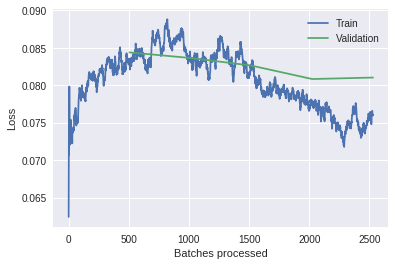

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

You won't really know how you're going until you submit to Kaggle, since the [leaderboard](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/leaderboard)] isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.

In [0]:
learn.export()

## fin

(This section will be covered in part 2 - please don't ask about it just yet! :) )

In [0]:
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg.tar.7z | tar xf - -C {path}
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg-additional.tar.7z | tar xf - -C {path}

In [0]:
test = ImageItemList.from_folder(path/'test-jpg').add(ImageItemList.from_folder(path/'test-jpg-additional'))
len(test)

61191

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [0]:
labelled_preds[:5]

['agriculture cultivation partly_cloudy primary road',
 'clear haze primary water',
 'agriculture clear cultivation primary',
 'clear primary',
 'partly_cloudy primary']

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [0]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [0]:
df.to_csv(path/'submission.csv', index=False)

In [0]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 2.18M/2.18M [00:02<00:00, 1.05MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

Private Leaderboard score: 0.9296 (around 80th)

## Augmentation example with one image

In [0]:
# Function that returns an image from its url
def get_img(img_url): return open_image(img_url)


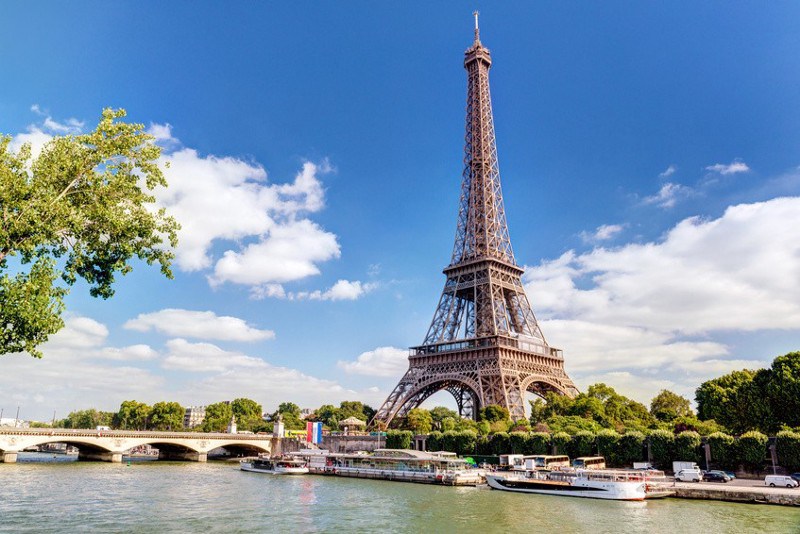

In [0]:
img_url = '/content/sample_data/eiffelTower.jpeg'
get_img(img_url)

## A few Image Augmentation Examples

### Centering, cropping and padding - get_transforms()

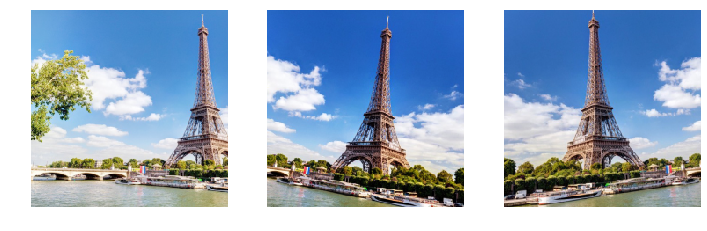

In [0]:
tfms = get_transforms()
_, axs = plt.subplots(1,3,figsize=(12,6))
for ax in axs.flatten():
    img = get_class_ex().apply_tfms(tfms[0], get_class_ex(), size=224)
    img.show(ax=ax)

NOTE:  3 photos of the Eiffel Tower generated by the use of get_transforms (): cropping, padding, centering.

### flip vertical or 90 degrees rotation

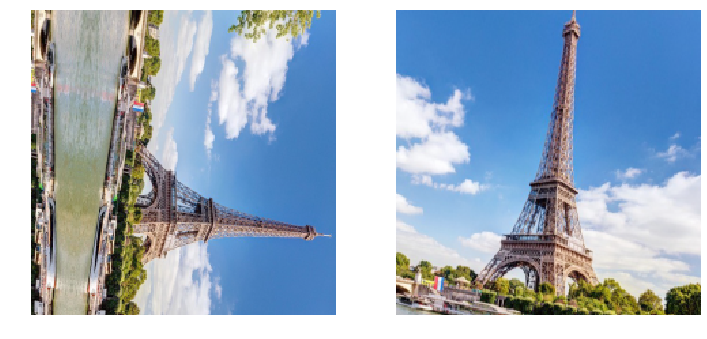

In [0]:
tfms = get_transforms(flip_vert=True)
_, axs = plt.subplots(1,2,figsize=(12,6))
for ax in axs.flatten():
    img = get_class_ex().apply_tfms(tfms[0], get_class_ex(), size=224)
    img.show(ax=ax)


### Max zoom

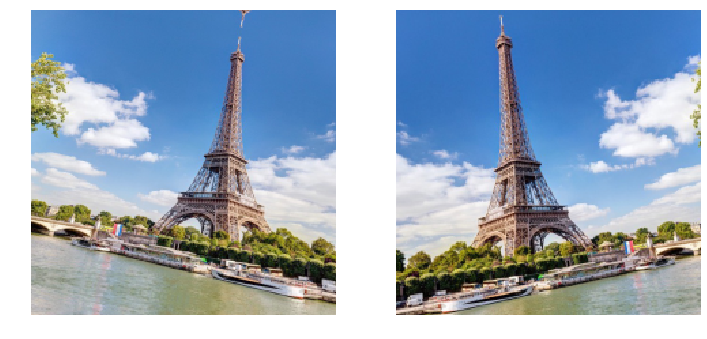

In [0]:
tfms = get_transforms(max_zoom=1.05)
_, axs = plt.subplots(1,2,figsize=(12,6))
for ax in axs.flatten():
    img = get_class_ex().apply_tfms(tfms[0], get_class_ex(), size=224)
    img.show(ax=ax)


### max_warp
`max_warp` will change the perspective of the picture.

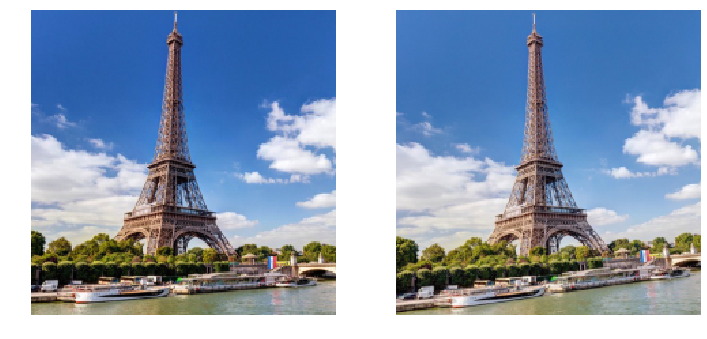

In [0]:
tfms = get_transforms(max_warp=0.)
_, axs = plt.subplots(1,2,figsize=(12,6))
for ax in axs.flatten():
    img = get_class_ex().apply_tfms(tfms[0], get_class_ex(), size=224)
    img.show(ax=ax)
